In [5]:
# Importing metadata zip file and converting it to dataframe

import json
import gzip
import pandas as pd

def getDF(path):
  # Unzip the file, load in each line as an object
  g = gzip.open(path, 'rb')
  g = [json.loads(l) for l in g]

  # Map to a dictionary, then load in as a dataframe
  dict_df = {i: d for (i, d) in enumerate(g)}
  return pd.DataFrame.from_dict(dict_df, orient='index')

df = getDF('meta_ALL_Beauty.json.gz')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18648\2769020576.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:

# Selecting only the colums that are required for analysis

colums_description_asin = ["description","asin"]
df = df[colums_description_asin]

df.describe()

,description,asin
count,32892,32892
unique,13751,32488
top,[],B00027CDOW
freq,17773,2


In [7]:
# Descriptions in the json file are a list of strings, converting to sting for easy cleaning
df["newdescription"] = df.description.map(lambda x: ".".join(x).replace("\n",""))


In [8]:
# Remove empty descriptions
#df = df.drop(df[df["newdescription"] == ""].index)

#print(len(df)) 



In [9]:
df = df.drop(df[ ( (df["newdescription"] == "" ) | ( df["newdescription"].isnull()) ) ].index)

df

,description,asin,newdescription
0,[Loud 'N Clear Personal Sound Amplifier allows...,6546546450,Loud 'N Clear Personal Sound Amplifier allows ...
1,[No7 Lift & Luminate Triple Action Serum 50ml ...,7178680776,No7 Lift & Luminate Triple Action Serum 50ml b...
2,[No7 Stay Perfect Foundation now stays perfect...,7250468162,No7 Stay Perfect Foundation now stays perfect ...
4,[Lacto Calamine Skin Balance Daily Nourishing ...,7414204790,Lacto Calamine Skin Balance Daily Nourishing L...
5,[Mary Kay Satin Hands Peach Hand Cream Travel ...,7535842801,Mary Kay Satin Hands Peach Hand Cream Travel S...
...,...,...,...
32880,[Move over soap on a rope! This heavy-duty Bri...,B01HIHLFOC,Move over soap on a rope! This heavy-duty Bric...
32884,[Eau de parfum spray vial mini design house: y...,B01HIPOQ2M,Eau de parfum spray vial mini design house: yv...
32885,[Pokemon Plush 9.2 Inch / 23cm Gengar Doll Stu...,B01HIUEEHO,Pokemon Plush 9.2 Inch / 23cm Gengar Doll Stuf...
32886,[New and unused product. 100% authentic Benefi...,B01HIWKGOM,New and unused product. 100% authentic Benefit...


In [10]:
# Remove duplicate asin so can have only unique products
df[df.duplicated("asin")]
df = df.drop_duplicates("asin", keep="last")
df.describe()

,description,asin,newdescription
count,14821,14821,14821
unique,13749,14821,13743
top,"[For over 60 years, Betty Dain Creations, Inc....",6546546450,"For over 60 years, Betty Dain Creations, Inc. ..."
freq,59,1,59


In [11]:
# Remove duplicate description
df[df.duplicated("newdescription")]
df = df.drop_duplicates("newdescription", keep="last")
df.describe() 

,description,asin,newdescription
count,13743,13743,13743
unique,13743,13743,13743
top,[Loud 'N Clear Personal Sound Amplifier allows...,6546546450,Loud 'N Clear Personal Sound Amplifier allows ...
freq,1,1,1


In [12]:
# Removing redundant old description column
colums_description_asin = ["newdescription","asin"]
df = df[colums_description_asin]

df.describe()

,newdescription,asin
count,13743,13743
unique,13743,13743
top,Loud 'N Clear Personal Sound Amplifier allows ...,6546546450
freq,1,1


In [13]:
# Identify range of descriptions in after duplicates removal

df_descriptions_without_empty = df["newdescription"].apply(lambda x: len(x.split()))

df_descriptions_without_empty.describe([0.1,0.15,0.20,0.25,0.30,0.75,0.85,0.90,0.92,0.95,0.97,0.98,0.99])

# 97% upper limit of 259 (same % milit as reviews)
# 11 words (same numbe of words as reviews) 20% because no assuption is made on how much more each one is informative as well as descriptions 
# being a smaller sample


count    13743.000000
mean        63.643600
std         91.940065
min          1.000000
10%          7.000000
15%          9.000000
20%         11.000000
25%         14.000000
30%         17.000000
50%         39.000000
75%         79.000000
85%        114.000000
90%        148.000000
92%        169.000000
95%        217.000000
97%        259.000000
98%        288.000000
99%        324.000000
max       3224.000000
Name: newdescription, dtype: float64

In [14]:
# Remove descriptions with more or less than xx pre-cleaned words

# Split at any white space 
df["num_words_description"] = df["newdescription"].apply(lambda x: len(x.split()))

# Check if under or equal to 80% upper limmit words fulfils withs condition and set it
df = df[(df["num_words_description"] <= 259) & (df["num_words_description"] >= 11)]

df["newdescription"].describe()

count                                                 10710
unique                                                10710
top       Loud 'N Clear Personal Sound Amplifier allows ...
freq                                                      1
Name: newdescription, dtype: object

In [15]:
# Check shortening worked
df_descriptions_without_empty = df["newdescription"].apply(lambda x: len(x.split()))

df_descriptions_without_empty.describe([0.1,0.15,0.20,0.25,0.30,0.75,0.85,0.90,0.92,0.95,0.97,0.98,0.99])


count    10710.000000
mean        65.241923
std         53.053433
min         11.000000
10%         15.000000
15%         18.000000
20%         23.000000
25%         27.000000
30%         31.000000
50%         49.000000
75%         86.000000
85%        115.000000
90%        142.000000
92%        157.000000
95%        185.000000
97%        211.000000
98%        225.000000
99%        243.000000
max        259.000000
Name: newdescription, dtype: float64

In [16]:
# Regrex for character removal
import re

# Spacy for spell check
import spacy
import contextualSpellCheck
nlp = spacy.load("en_core_web_sm")
contextualSpellCheck.add_to_pipe(nlp)

# NLTK for tokenisation and lemmatization
import nltk

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

nltk.download('wordnet')

# Spacy stop word creation
stopping_words = spacy.lang.en.stop_words.STOP_WORDS
stopping_words_new = stopping_words


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
stopping_words_to_remove = ['without' , 'not', 'less', 'noting', 'none','no']
for word in list(stopping_words_new):
    if word in stopping_words_to_remove:
        stopping_words_new.remove(word)
print(stopping_words_new)

{'did', 'both', 'someone', 'seemed', 'by', 'doing', 'others', 'something', 'of', 'some', 'other', 'nowhere', 'really', 'a', 'almost', 'one', 'across', 'she', 'meanwhile', 'well', 'during', 'her', 'up', '‘d', 'which', 'whence', 'with', '’ll', "'re", 'six', 'amount', 'who', '’m', 'where', 'show', 'himself', 'mostly', 'over', '‘ll', 'always', 'hers', 'above', 'enough', 'together', 'move', 'is', 'whether', "'m", 'mine', 'front', 'such', 'still', 'becomes', 'five', 'get', '‘re', 'third', 'empty', 'least', 'go', 'he', 'nothing', 'thereby', 'anywhere', 'have', 'ca', 'while', 'everything', 'those', 'most', 'otherwise', 'because', "'s", 'amongst', 'made', 'became', 'herself', 'nine', 'am', 'part', 'these', 'though', 'never', 'afterwards', 'eleven', 'noone', 'even', '‘s', 'whither', 'beside', 'three', 'further', 'due', 'or', 'serious', 'bottom', 'using', "'ve", 'done', 'seem', 'behind', 'become', 'make', 'so', 'another', 'quite', 'except', 'hundred', 'your', 'either', 'please', 'few', 'off', 'ba

In [18]:
# Preprocessing of descriptions

def preprocessing(raw_string):
    # Remove html tags and anything inside them 
    no_html = re.sub(r'<[^>]*>','', raw_string)
    #print("after removing html", no_html)


    # Make everything lowercase
    lowercase_column = no_html.lower()
    #print("lowercase", lowercase_column)

    # Remove apostrophe to enable spell check to correct words with apostrophe
    without_apostrophe = re.sub(r'[\']', '', lowercase_column)

    # ! Need to double check again where best to use this spell check
    # 
    # .pipe for batches of text
    #doc = list(nlp.pipe(without_apostrophe))
    #doc = nlp(without_apostrophe)

    #spell_checked = doc._.outcome_spellCheck

    # Remove all non alphabetic instances that aren't a space and replace them with a space using Regrex
    alphabetic_column = re.sub(r'[^a-z\s]', ' ', without_apostrophe)
    #print("removed numerical and punctuation", alphabetic_column)

    # Tokenize string into individual words
    tokens = word_tokenize(alphabetic_column)

    # Remove stopping words using Spacy library
    tokens_without_stopping_words = [token for token in tokens if token not in stopping_words_new]

    # Lemmatize tokens using nltk and join them into sentances
    sentances_without_stop_words = ' '.join([lemmatizer.lemmatize(t) for t in tokens_without_stopping_words])

    return sentances_without_stop_words


In [19]:
df["clean_description"] = df["newdescription"].head(1000).apply(preprocessing)

df["clean_description"]

df["clean_description"].to_csv("out_new.csv")

In [20]:
# Remove any empty descriptions that appear because of head()
df = df.drop(df[ ( (df["clean_description"] == "" ) | ( df["clean_description"].isnull()) ) ].index)

In [21]:
# Identifying range of descriptions in after cleaning
 
df_description_without_empty_clean = df["clean_description"].apply(lambda x: len(x.split()))
#df_descriptions_without_empty.describe()
df_description_without_empty_clean.describe([0.03,0.1,0.2,0.3,0.75,0.85,0.90,0.95])

count    1000.00000
mean       44.84100
std        32.72263
min         4.00000
3%          9.00000
10%        13.00000
20%        19.00000
30%        24.70000
50%        35.00000
75%        59.00000
85%        76.15000
90%        92.00000
95%       114.00000
max       221.00000
Name: clean_description, dtype: float64

In [22]:
from collections import Counter
Counter(" ".join(df["clean_description"]).split()).most_common(100)

[('skin', 762),
 ('hair', 372),
 ('oil', 288),
 ('use', 270),
 ('natural', 268),
 ('product', 266),
 ('body', 229),
 ('fragrance', 214),
 ('help', 207),
 ('not', 178),
 ('oz', 174),
 ('clean', 171),
 ('free', 170),
 ('formula', 162),
 ('shave', 156),
 ('dry', 151),
 ('no', 146),
 ('color', 141),
 ('smooth', 135),
 ('soft', 134),
 ('x', 130),
 ('day', 129),
 ('ingredient', 128),
 ('vitamin', 126),
 ('time', 117),
 ('blend', 115),
 ('soap', 113),
 ('long', 111),
 ('scent', 110),
 ('system', 109),
 ('size', 107),
 ('water', 107),
 ('shaving', 106),
 ('head', 105),
 ('blade', 103),
 ('extract', 102),
 ('line', 99),
 ('face', 97),
 ('easy', 97),
 ('contains', 96),
 ('nbsp', 96),
 ('organic', 94),
 ('bath', 94),
 ('provides', 93),
 ('hand', 92),
 ('designed', 92),
 ('razor', 91),
 ('cream', 89),
 ('note', 87),
 ('lip', 86),
 ('e', 84),
 ('essential', 84),
 ('woman', 82),
 ('work', 82),
 ('perfect', 81),
 ('area', 81),
 ('amp', 81),
 ('without', 80),
 ('new', 79),
 ('trimmer', 79),
 ('gel', 7

In [23]:
###############################################################
#                      Cleaning Keywords                                

# TODO use finalise list of keywords

enviromental = ['biodegradable', 'reduced packaging', 'reduced', 'sustainable', 'plastic-free', 'sustainably sourced', 'compostable', 'renewable', 'renewable energy', 'reusable', 'biodegradable', 'organic', 'refillable', 'refills', 'solid bar', 'recycled', 'cardboard', 'reef safe','reef-friendly', 'oxybenzone free', 'triclosan-free', 'microplastics free', 'microbeads free', 'palm oil free', 'HDPE', 'post-consumer recycled plastic', 'renewable energy', 'recycling scheme', 'sustainably sourced', 'low-impact', 'carbon neutral', 'carbon offsetting', 'eco', 'soil association', 'conservation', 'COSMOS', 'NATRUE', 'RSPO', 'FSC']
social = ['No animal testing', 'cruelty-free', 'vegan', 'plant-based', 'palm oil-free', 'ethical', 'vegan society', 'PETA', 'leaping bunny', 'fair trade', 'local', 'hand-made', 'small business'] 
economic = ['Fair trade', 'renewable energy', 'circular economy', 'locally sourced', 'local', 'small business', 'job creation']
health = ['non-toxic', 'bio', 'organic', 'plant-based', 'paraben free', 'triclosan-free', 'fragrance-free', 'synthetic fragrance-free', 'SLS free', 'phthalates free','nanoparticles free', 'non-nano', 'formaldehyde free', 'phthalates free', 'no GMO', 'soil association', 'COSMOS', 'NATRUE', 'USDA']

# Cleaning keywords in the same way as the corpus
clean_enviro = list(map(preprocessing, enviromental))
clean_social = list(map(preprocessing, social))
clean_economic = list(map(preprocessing, economic))
clean_health = list(map(preprocessing, health))

print(clean_enviro)
print(clean_social)
print(clean_economic)
print(clean_health)


['biodegradable', 'reduced packaging', 'reduced', 'sustainable', 'plastic free', 'sustainably sourced', 'compostable', 'renewable', 'renewable energy', 'reusable', 'biodegradable', 'organic', 'refillable', 'refill', 'solid bar', 'recycled', 'cardboard', 'reef safe', 'reef friendly', 'oxybenzone free', 'triclosan free', 'microplastics free', 'microbeads free', 'palm oil free', 'hdpe', 'post consumer recycled plastic', 'renewable energy', 'recycling scheme', 'sustainably sourced', 'low impact', 'carbon neutral', 'carbon offsetting', 'eco', 'soil association', 'conservation', 'cosmos', 'natrue', 'rspo', 'fsc']
['no animal testing', 'cruelty free', 'vegan', 'plant based', 'palm oil free', 'ethical', 'vegan society', 'peta', 'leaping bunny', 'fair trade', 'local', 'hand', 'small business']
['fair trade', 'renewable energy', 'circular economy', 'locally sourced', 'local', 'small business', 'job creation']
['non toxic', 'bio', 'organic', 'plant based', 'paraben free', 'triclosan free', 'fragr

In [24]:
#                      Testing negative keywords

non_enviromental = ['packaging','plastic',  'oxybenzone', 'triclosan', 'microplastics', 'microbeads', 'palm oil']
non_social = ['animal testing', 'palm oil','imported'] 
non_health = ['toxic', 'paraben', 'triclosan','SLS', 'phthalates','nanoparticles', 'nano', 'formaldehyde', 'phthalates', 'GMO']

# Cleaning keywords in the same way as the corpus
non_clean_enviro = list(map(preprocessing, non_enviromental))
non_clean_social = list(map(preprocessing, non_social))
non_clean_health = list(map(preprocessing, non_health))

print(non_clean_enviro)
print(non_clean_social)
print(non_clean_health)


['packaging', 'plastic', 'oxybenzone', 'triclosan', 'microplastics', 'microbeads', 'palm oil']
['animal testing', 'palm oil', 'imported']
['toxic', 'paraben', 'triclosan', 'sl', 'phthalates', 'nanoparticles', 'nano', 'formaldehyde', 'phthalates', 'gmo']


In [32]:
###############################################################
#                      CorEx                                  #
# Code based on
# https://github.com/gregversteeg/corex_topic/blob/master/corextopic/example/corex_topic_example.ipynb

# Setting anchor words for corEx
# Anchor with group of words
anchor_words = [clean_enviro, clean_social, clean_economic, clean_health]#, non_clean_enviro, non_clean_social, non_clean_health]

#------------------------------------------------------
#                   Vectorisation
# fow working with sparse arrays
import scipy.sparse as ss

# Vectorisation
from sklearn.feature_extraction.text import CountVectorizer

# Vectorise the dataset

# TODO double check which stopwords removed no need for stop_words='englsih' because those are removed already 
# Give better results with them 
# TODO but need to check about NEGATIVES with it and wihtouth it
# TODO check if max_features=20000 is needed, if there is a point to use it as it will select top words from everything, number might need adjusting
# TODO invest9gate the chance of using Max_df to remove some words with high frequency
# binary set to True because this takes frequesncy of each word into account (for GLDA this need to be set to default false as it only accepts 0 or 1)
vectorizer = CountVectorizer( binary=True)         

doc_word = vectorizer.fit_transform(df["clean_description"]) # dont need .data cuz we have dataframe
# Transform descriptions into a sparse matrix
doc_word = ss.csr_matrix(doc_word)

doc_word.shape # n_docs x m_words

# TODO should I be adding my seedwords to the vocabulary?
# Getting words for labeling the columns of the matrix
words = list(np.asarray(vectorizer.get_feature_names_out()))
print(words)
#-----------------------------------------------------
#           COREX
import corextopic.corextopic as ct

# TODO experiment with anchor strength
anchored_topic_model = ct.Corex(n_hidden=4, seed=2)
anchored_topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=10);



['aa', 'aaa', 'abdominal', 'abduction', 'aberration', 'ability', 'able', 'abnormal', 'abnormality', 'abrasion', 'abrasive', 'absent', 'absolute', 'absolutely', 'absorb', 'absorbable', 'absorbed', 'absorbency', 'absorbent', 'absorbing', 'absorbs', 'absorption', 'abundant', 'ac', 'acacia', 'accelerated', 'accelerator', 'acceleratorsup', 'accent', 'accented', 'accentuate', 'accept', 'acceptance', 'accepted', 'access', 'accessoriesthis', 'accessory', 'accidental', 'acclaimed', 'accommodate', 'accompanied', 'accompany', 'accomplished', 'accord', 'accordes', 'according', 'account', 'accu', 'accucontrol', 'accumulation', 'accuracy', 'accurately', 'accuvac', 'ace', 'acesulfame', 'acetate', 'ache', 'achieve', 'achieved', 'achieving', 'aching', 'acid', 'acidcitric', 'aciddibasic', 'acidic', 'acidifier', 'acidity', 'acidmagnesium', 'acidmantle', 'acidsfor', 'acne', 'acneic', 'acnopur', 'acqua', 'acrylate', 'acrylic', 'act', 'acticuf', 'acting', 'action', 'activ', 'activated', 'activator', 'active

In [33]:
#               Corex output

for n in range(len(anchor_words)):
    topic_words,_,_ = zip(*anchored_topic_model.get_topics(topic=n))
    print('{}: '.format(n) + ', '.join(topic_words))


0: organic, refill, biodegradable, reusable, sustainable, note, eco, affect, fragrance, sandalwood
1: hand, vegan, local, trimmer, cordless, contour, norelcos, norelco, charging, head
2: house, local, recommended, launched, posse, wear, blend, aging, design, diet
3: organic, ingredient, product, bio, oil, natural, extract, animal, not, known


In [27]:
'''
Withouth spell check

0: organic, fragrance, biodegradable, launched, house, note, scent, recommended, blend, refill
1: hand, vegan, trimmer, cordless, head, shaving, blade, shave, system, norelco
2: local, diet, aging, similarly, consider, instance, whenapplyingany, alter, oilyskin, chemistry
3: organic, vitamin, oil, ingredient, skin, extract, natural, animal, product, healthy
'''

'\nWithouth spell check\n\n0: organic, fragrance, biodegradable, launched, house, note, scent, recommended, blend, refill\n1: hand, vegan, trimmer, cordless, head, shaving, blade, shave, system, norelco\n2: local, diet, aging, similarly, consider, instance, whenapplyingany, alter, oilyskin, chemistry\n3: organic, vitamin, oil, ingredient, skin, extract, natural, animal, product, healthy\n'

In [35]:
# Show top words for selected topic, number is "highest mutual information with the topic"
anchored_topic_model.get_topics(topic=3, n_words=10)

[('organic', 1.0218582618737295, 1.0),
 ('ingredient', 0.09464376557412921, 1.0),
 ('product', 0.05493255283329923, 1.0),
 ('bio', 0.05465075901712661, 1.0),
 ('oil', 0.0518417597450066, 1.0),
 ('natural', 0.05173751927281678, 1.0),
 ('extract', 0.049909779444404945, 1.0),
 ('animal', 0.0488691932125922, 1.0),
 ('not', 0.036349636411451836, 1.0),
 ('known', 0.03519484377823036, 1.0)]

In [36]:
# Show all documents for each topic
# TODO what is exactly this number?
anchored_topic_model.get_top_docs(topic=1, n_docs=10000, sort_by='log_prob')#[-20:]

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


[(780, 0.0),
 (250, 0.0),
 (768, 0.0),
 (255, 0.0),
 (258, 0.0),
 (765, 0.0),
 (761, 0.0),
 (753, 0.0),
 (271, 0.0),
 (273, 0.0),
 (276, 0.0),
 (742, 0.0),
 (280, 0.0),
 (282, 0.0),
 (737, 0.0),
 (289, 0.0),
 (290, 0.0),
 (732, 0.0),
 (336, 0.0),
 (335, 0.0),
 (334, 0.0),
 (679, 0.0),
 (330, 0.0),
 (326, 0.0),
 (776, 0.0),
 (690, 0.0),
 (315, 0.0),
 (312, 0.0),
 (309, 0.0),
 (308, 0.0),
 (304, 0.0),
 (302, 0.0),
 (317, 0.0),
 (676, 0.0),
 (778, 0.0),
 (245, 0.0),
 (887, 0.0),
 (883, 0.0),
 (873, 0.0),
 (161, 0.0),
 (163, 0.0),
 (870, 0.0),
 (177, 0.0),
 (180, 0.0),
 (190, 0.0),
 (830, 0.0),
 (198, 0.0),
 (201, 0.0),
 (202, 0.0),
 (203, 0.0),
 (204, 0.0),
 (205, 0.0),
 (209, 0.0),
 (783, 0.0),
 (786, 0.0),
 (234, 0.0),
 (233, 0.0),
 (791, 0.0),
 (228, 0.0),
 (491, 0.0),
 (796, 0.0),
 (800, 0.0),
 (217, 0.0),
 (816, 0.0),
 (214, 0.0),
 (213, 0.0),
 (210, 0.0),
 (798, 0.0),
 (146, 0.0),
 (340, 0.0),
 (674, 0.0),
 (561, 0.0),
 (420, 0.0),
 (557, 0.0),
 (423, 0.0),
 (547, 0.0),
 (546, 0.0),

In [1]:
import corextopic.vis_topic as vt
vt.vis_rep(anchored_topic_model, column_label=words, prefix='twenty')

KeyboardInterrupt: 

349


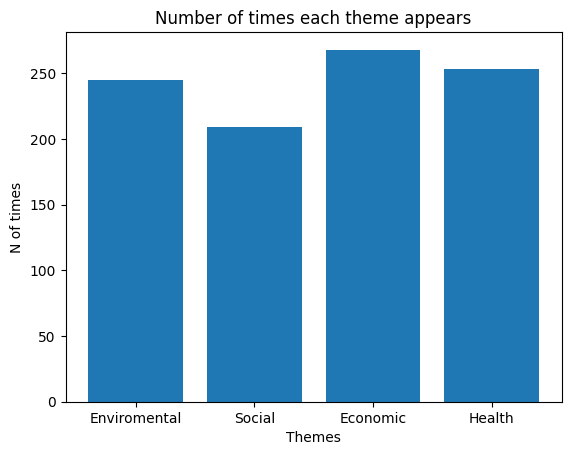

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Read labels from labels text file in twenty
data = np.loadtxt('twenty\labels.txt', delimiter=',')

# Extract all columns but not the first one
columns = data[:, 1:]

# Summation of each column to add up how often each theme appears
sum_themes = np.sum(columns, axis=0)

# TODO if non of the rows = 1 then make label 5 (no theme) =+

# Identify and sum any rows without 1s in each column by checking if the sum of the whole row is 0
rows_without_theme = np.sum(columns, axis=1) == 0

# Sum
num_rows_without_theme = np.sum(rows_without_theme)
print(num_rows_without_theme)

# Add new column represting no themes classified with 1 as no theme and 0 having a theme
data = np.column_stack((data, rows_without_theme.astype(int)))

# Create new labels text file with addition of the new "no themes" column as int
np.savetxt( 'new_lables.txt', data, delimiter=',', fmt='%d')


# Display the results
labels = ['Enviromental', 'Social', 'Economic', 'Health']
plt.bar(labels, sum_themes)
plt.xlabel('Themes')
plt.ylabel('N of times')
plt.title('Number of times each theme appears')
plt.show()

In [39]:
# from https://www.kaggle.com/code/nvpsani/topic-modelling-using-guided-lda
# used workaround as well

import numpy as np
from lda import guidedlda as glda

model = glda.GuidedLDA(n_topics=4, n_iter=2000, random_state=7, refresh=20,alpha=0.01,eta=0.01)
